## 🔎 Initial Data Inputation and Exploratory Data Analysis

### Dataset:

https://www.kaggle.com/competitions/playground-series-s3e3

In [ ]:
!pip install --upgrade catboost pycaret scipy seaborn pandas scikit-learn catboost lightgbm xgboost lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setu

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [ ]:
# Loading data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

display(train_data.head())
display(test_data.head())

original = pd.read_csv("original.csv")
original['Attrition'] = original['Attrition'].map({'Yes': 1, 'No': 0})

original.drop(columns=['EmployeeNumber'], inplace=True)
train_data.drop(columns=['id'], inplace=True)
original = original[list(train_data.columns)]

train_data = pd.concat([train_data, original]).reset_index(drop=True)
# train_data.to_csv('new_train.csv', index=False)
display(train_data.head())

id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently        599  Research & Development   
1   1   35      Travel_Rarely        921                   Sales   
2   2   32      Travel_Rarely        718                   Sales   
3   3   38      Travel_Rarely       1488  Research & Development   
4   4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...            80                 1   
1                        1  ...            80                 1   
2                        3  ...            80                 2   
3                        3  ...            80                 0   
4                        2  ...            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 10                      2               3              10   
1                  4                      3               3               4   
2                  4                      3               3               3   
3                 15                      1               1               6   
4                 31                      0               3              31   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                  0                        7                     8          0  
1                  2                        0                     3          0  
2                  2                        1                     2          0  
3                  0                        0                     2          0  
4                 14                        4                    10          1  

[5 rows x 35 columns]

id  Age     BusinessTravel  DailyRate              Department  \
0  1677   19         Non-Travel        992  Research & Development   
1  1678   45      Travel_Rarely       1136                   Sales   
2  1679   37      Travel_Rarely        155  Research & Development   
3  1680   32      Travel_Rarely        688  Research & Development   
4  1681   29  Travel_Frequently        464  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          1        Medical              1   
1                 4          4      Marketing              1   
2                13          3  Life Sciences              1   
3                 1          4  Life Sciences              1   
4                 9          1  Life Sciences              1   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        4  ...                        4             80   
1                        3  ...                        3             80   
2                        4  ...                        2             80   
3                        3  ...                        3             80   
4                        3  ...                        1             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  1                     2                2   
1                 1                  7                     3                3   
2                 2                 13                     2                2   
3                 0                 14                     2                2   
4                 0                  1                     5                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              1                   0                        0   
1              2                   2                        2   
2              7                   7                        1   
3             14                  10                       11   
4              1                   0                        0   

   YearsWithCurrManager  
0                     0  
1                     2  
2                     7  
3                     8  
4                     0  

[5 rows x 34 columns]

Age     BusinessTravel  DailyRate              Department  \
0   36  Travel_Frequently        599  Research & Development   
1   35      Travel_Rarely        921                   Sales   
2   32      Travel_Rarely        718                   Sales   
3   38      Travel_Rarely       1488  Research & Development   
4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  Gender  ...  StandardHours  StockOptionLevel  \
0                        4    Male  ...             80                 1   
1                        1    Male  ...             80                 1   
2                        3    Male  ...             80                 2   
3                        3  Female  ...             80                 0   
4                        2  Female  ...             80                 0   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                 10                     2                3             10   
1                  4                     3                3              4   
2                  4                     3                3              3   
3                 15                     1                1              6   
4                 31                     0                3             31   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager Attrition  
0                   0                        7                     8         0  
1                   2                        0                     3         0  
2                   2                        1                     2         0  
3                   0                        0                     2         0  
4                  14                        4                    10         1  

[5 rows x 34 columns]

In [ ]:
train_data.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition 

## Conduct Summary Statistics

Calculate summary statistics (mean, median, standard deviation, etc.) for numerical features like 'Age', 'DailyRate', 'DistanceFromHome', etc.

In [ ]:
# Checking for nulls
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]

print(f"{len(missing_train)} Null Values in Training Set:", missing_train.to_string())
print(f"{len(missing_test)} Null Values in Testing Set:", missing_test.to_string())
# We find that there is no missing data for now.

# Loading vars
X_train = train_data.drop(columns=['Attrition'])
y_train = train_data['Attrition']
X_test = test_data.drop(columns=['id'])

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)

0 Null Values in Training Set: Series([], )
0 Null Values in Testing Set: Series([], )
X_train shape:  (3147, 33)
Y_train shape:  (3147,)
X_test shape:  (1119, 33)


In [ ]:
# Descriptive statistics for numerical features:
numerical_sumary = train_data.describe()
numerical_sumary

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  3147.000000  3147.000000       3147.000000  3147.000000         3147.0   
mean     36.451223   850.586273          8.921513     2.926279            1.0   
std       8.815861   390.859919          7.961278     1.032051            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   543.000000          2.000000     2.000000            1.0   
50%      35.000000   852.000000          7.000000     3.000000            1.0   
75%      42.000000  1198.500000         13.000000     4.000000            1.0   
max      60.000000  3921.000000         29.000000    15.000000            1.0   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              3147.000000  3147.000000     3147.000000  3147.000000   
mean                  2.741023    66.907531        2.757865     2.029234   
std                   1.089733    19.877918        0.680183     1.094590   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    50.000000        2.000000     1.000000   
50%                   3.000000    67.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     7.000000   

       JobSatisfaction  ...  StandardHours  StockOptionLevel  \
count      3147.000000  ...         3147.0       3147.000000   
mean          2.762313  ...           80.0          0.755323   
std           1.100224  ...            0.0          0.810688   
min           1.000000  ...           80.0          0.000000   
25%           2.000000  ...           80.0          0.000000   
50%           3.000000  ...           80.0          1.000000   
75%           4.000000  ...           80.0          1.000000   
max           4.000000  ...           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        3147.000000            3147.000000      3147.000000   
mean           10.975850               2.763902         2.765809   
std             7.509438               1.214918         0.675707   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%             9.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            41.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     3147.000000         3147.000000              3147.000000   
mean         6.900858            4.183985                 2.076263   
std          5.998015            3.601691                 3.130744   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 2.000000   
max         41.000000           18.000000                15.000000   

       YearsWithCurrManager    Attrition  
count           3147.000000  3147.000000  
mean               4.156975     0.138862  
std                3.572003     0.345858  
min                0.000000     0.000000  
25%                2.000000     0.000000  
50%                3.000000     0.000000  
75%                7.000000     0.000000  
max               17.000000     1.000000  

[8 rows x 26 columns]

In [ ]:
# Selecting non-categorical columns
non_categorical_columns = train_data.select_dtypes(exclude=['object']).columns
# Displaying the non-categorical columns
print(len(non_categorical_columns))
non_categorical_columns

26


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [ ]:
# Identifying categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(len(categorical_columns))
categorical_columns

8


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
# Frequency count for categorical features
categorical_summary = {col: train_data[col].value_counts() for col in categorical_columns}
for col, value_counts in categorical_summary.items():
    print(f"----- {col} -----")
    print(value_counts)
    print("\n")

----- BusinessTravel -----
Travel_Rarely        2333
Travel_Frequently     538
Non-Travel            276
Name: BusinessTravel, dtype: int64


----- Department -----
Research & Development    2128
Sales                      917
Human Resources            102
Name: Department, dtype: int64


----- EducationField -----
Life Sciences       1381
Medical             1013
Marketing            311
Technical Degree     238
Other                164
Human Resources       40
Name: EducationField, dtype: int64


----- Gender -----
Male      1946
Female    1201
Name: Gender, dtype: int64


----- JobRole -----
Sales Executive              681
Research Scientist           636
Laboratory Technician        593
Manufacturing Director       341
Healthcare Representative    286
Manager                      213
Sales Representative         160
Research Director            151
Human Resources               86
Name: JobRole, dtype: int64


----- MaritalStatus -----
Married     1446
Single      1047
Divorced  

### Run Outlier Detection for Numerical Features

In [ ]:
# use Z-score to detect outliers in numerical features
from scipy import stats
import numpy as np

# Create an empty dictionary to hold outlier data
outliers_z = {}

# Calculate Z-scores for all numerical features
for column in train_data.select_dtypes(include=np.number).columns:
    z_scores = stats.zscore(train_data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = train_data[(abs_z_scores > 3)]
    outliers_z[column] = outliers

# Print the outliers for each feature
for feature, outlier_data in outliers_z.items():
    print(f"Outliers for {feature} based on Z-scores:\n{outlier_data}\n")


Outliers for Age based on Z-scores:
Empty DataFrame
Columns: [Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition]
Index: []

[0 rows x 34 columns]

Outliers for DailyRate based on Z-scores:
      Age     BusinessTravel  DailyRate              Department  \
1398   44  Travel_Frequently       3921  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1398                 1          3  Life Sciences              1   

      EnvironmentSatisfaction Gender  ...  StandardHours  St

In [ ]:
# use IQR method to detect outliers in numerical features
# Create an empty dictionary to hold outlier data
outliers_iqr = {}

# Calculate IQR and determine outliers for all numerical features
for column in train_data.select_dtypes(include=np.number).columns:
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_data[(train_data[column] < (Q1 - 1.5 * IQR)) | (train_data[column] > (Q3 + 1.5 * IQR))]
    outliers_iqr[column] = outliers

# Print the outliers for each feature
for feature, outlier_data in outliers_iqr.items():
    print(f"Outliers for {feature} based on IQR:\n{outlier_data}\n")


Outliers for Age based on IQR:
Empty DataFrame
Columns: [Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition]
Index: []

[0 rows x 34 columns]

Outliers for DailyRate based on IQR:
      Age     BusinessTravel  DailyRate              Department  \
1398   44  Travel_Frequently       3921  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1398                 1          3  Life Sciences              1   

      EnvironmentSatisfaction Gender  ...  StandardHours  StockOptionL

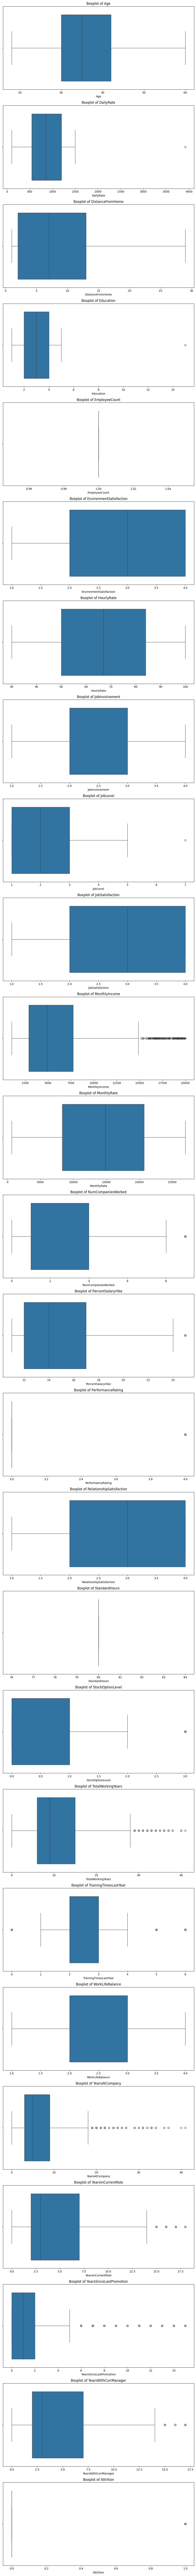

In [ ]:
# Use boxplot to visualize outliers for all numerical features
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical features
num_features = train_data.select_dtypes(include=np.number).columns
n_num_features = len(num_features)
fig, axs = plt.subplots(n_num_features, figsize=(10, n_num_features * 5))

for i, col in enumerate(num_features):
    sns.boxplot(x=train_data[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Analyze Class Distribution

Examine the distribution of the target variable 'Attrition' to understand the class balance.

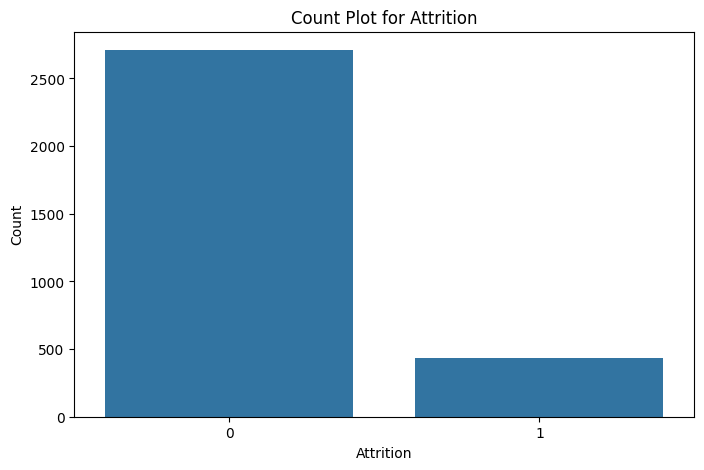

In [ ]:
# Create count plot for Attrition to show distribution of target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for 'Attrition'
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=train_data)
plt.title('Count Plot for Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculating proportions
attrition_counts = train_data['Attrition'].value_counts()
attrition_proportions = attrition_counts / len(train_data) * 100
attrition_proportions

0    86.113759
1    13.886241
Name: Attrition, dtype: float64

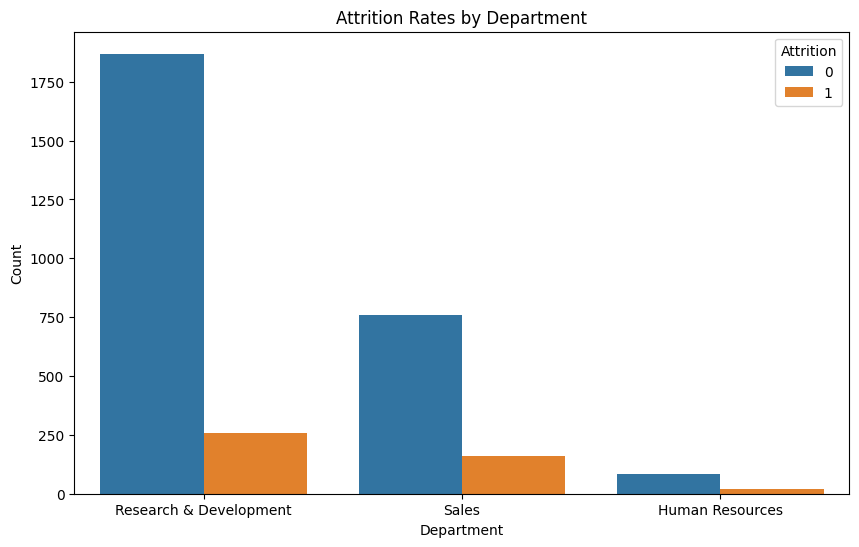

In [ ]:
# Segmented analysis by features (attrition rate across different departments)
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=train_data)
plt.title('Attrition Rates by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

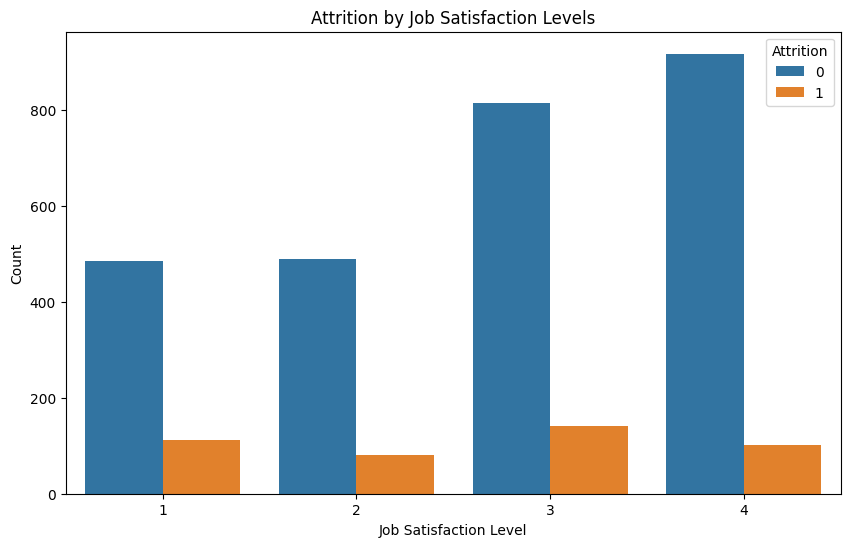

In [ ]:
# Interaction between JobSatisfaction and Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=train_data)
plt.title('Attrition by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.show()

### Correlation Analysis

Analyze the correlations between different numerical features and with the target variable.

<ipython-input-17-4fdba1ebd349>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.019089         -0.024006   0.214986   
DailyRate                 0.019089   1.000000          0.006007  -0.010259   
DistanceFromHome         -0.024006   0.006007          1.000000   0.003512   
Education                 0.214986  -0.010259          0.003512   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EnvironmentSatisfaction   0.019248   0.014082         -0.005604  -0.018394   
HourlyRate                0.025010   0.016439          0.016782   0.016324   
JobInvolvement            0.014198   0.014647          0.008171   0.047918   
JobLevel                  0.494513   0.018918         -0.022935   0.092793   
JobSatisfaction          -0.008569  -0.000990          0.011079  -0.021315   
MonthlyIncome             0.484906   0.013665         -0.038530   0.087150   
MonthlyRate               0.017596  -0.018623          0.022792 

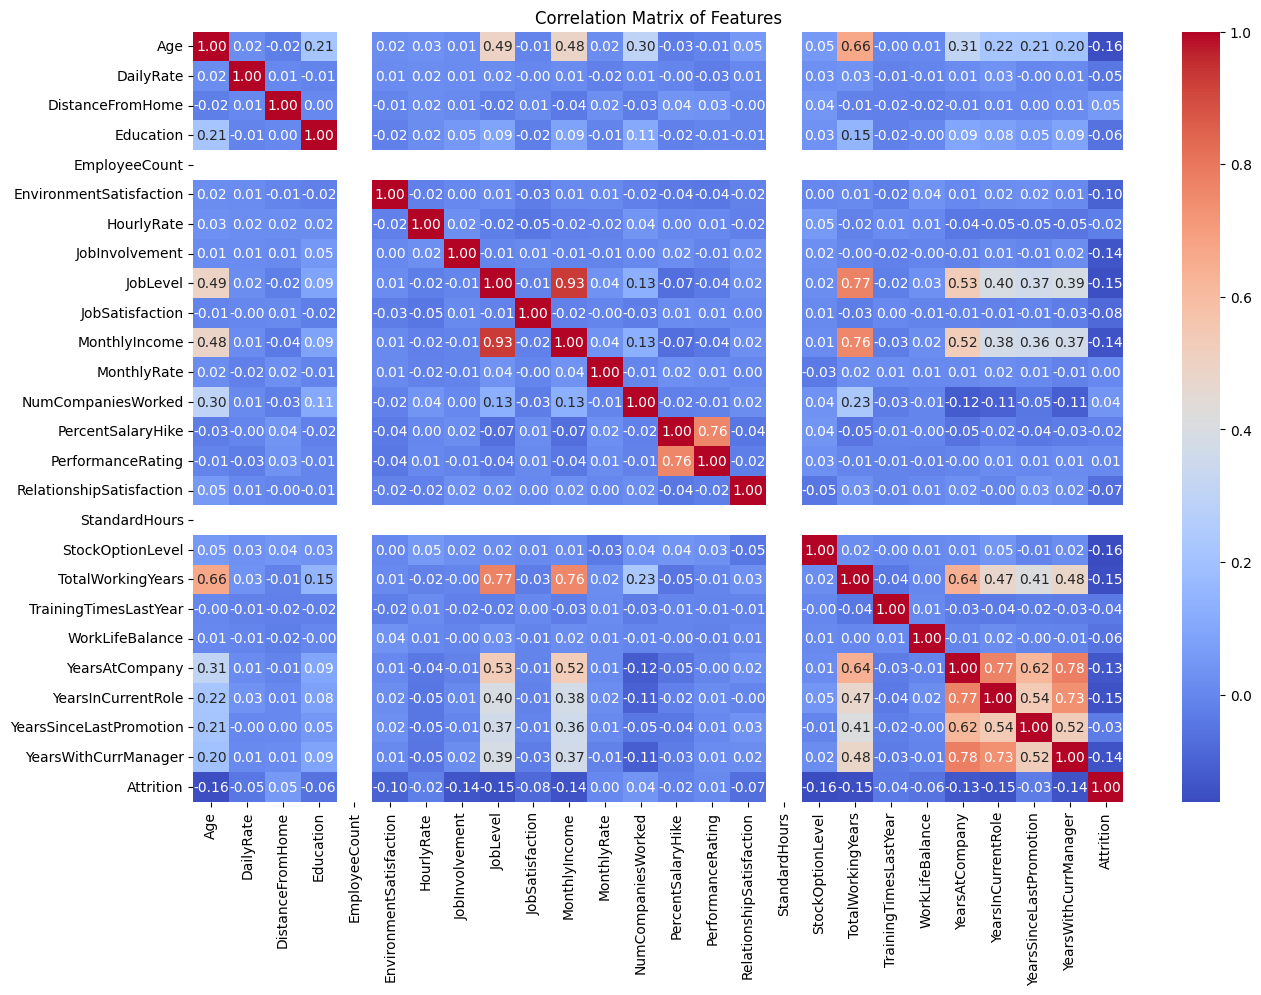

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train_data.corr()
# Export the correlation matrix to a CSV file
corr_matrix.to_csv('correlation_matrix.csv', index=True)
print(corr_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

### Investigate Feature Distributions

Create histograms and box plots to visualize and understand the spread, central tendency, and skewness of numerical features in the dataset, and bar charts to display the frequency distribution of categorical features.

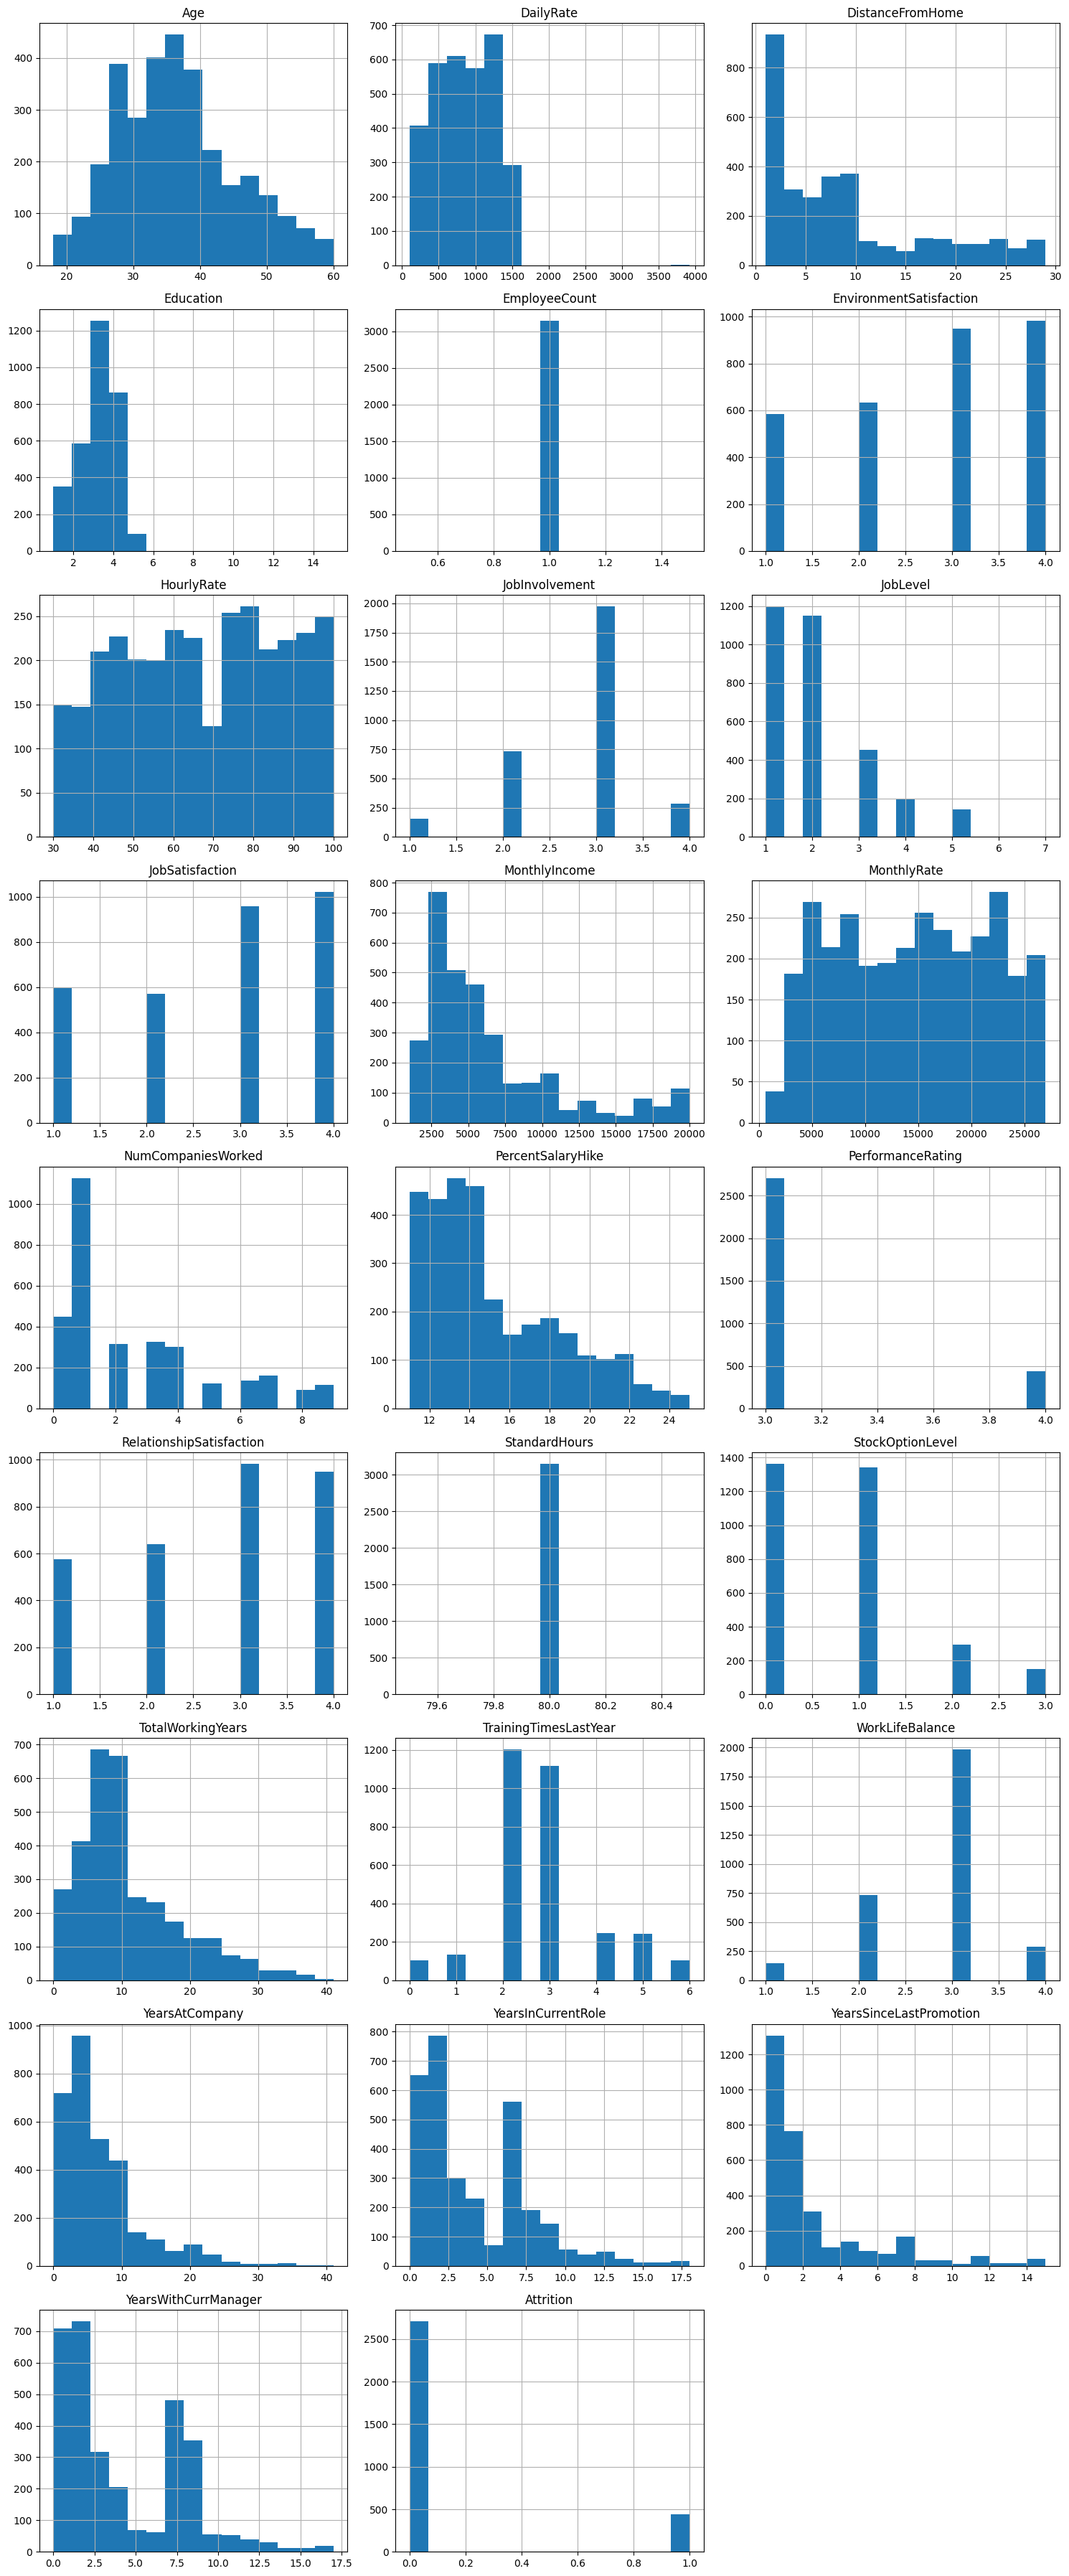

In [ ]:
import matplotlib.pyplot as plt

# Numerical features histogram with adjusted layout
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Determine the layout size
n_rows = len(numerical_features) // 3 + (len(numerical_features) % 3 > 0)
figsize_height = n_rows * 4

# Plotting histograms
plt.figure(figsize=(15, figsize_height))
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, 3, i + 1)
    train_data[col].hist(bins=15)
    plt.title(col)
    plt.tight_layout()

plt.show()

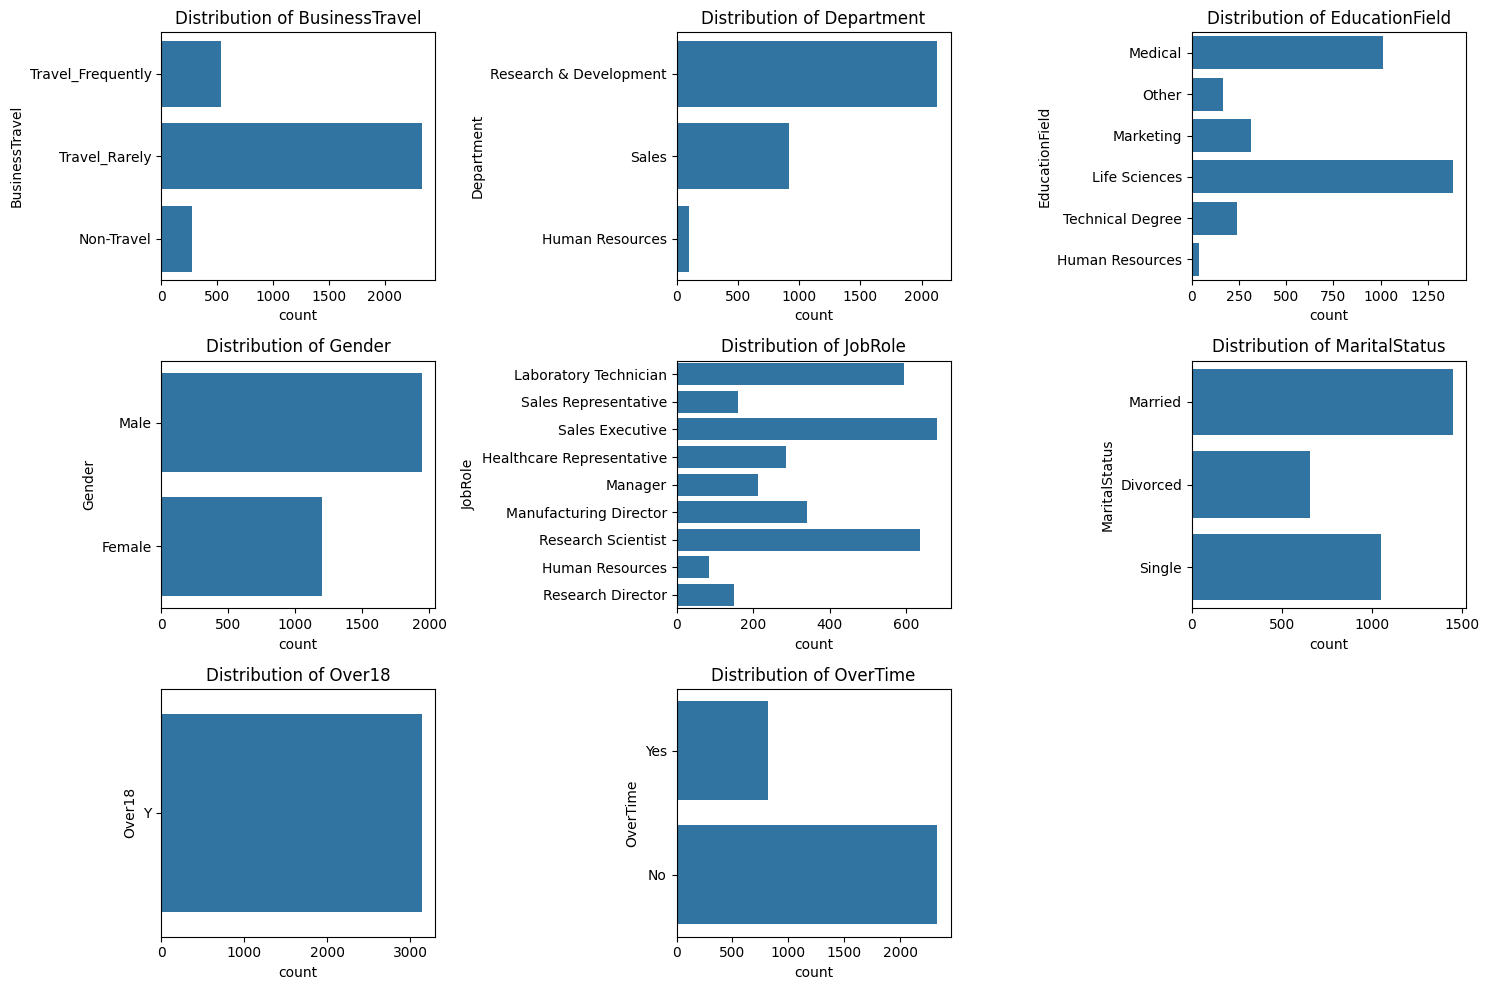

In [ ]:
# Categorical features bar chart
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=col, data=train_data)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

### Categorical Data Analysis

For categorical features like 'BusinessTravel', 'Department', 'EducationField', etc., use count plots or bar charts to visualize the frequency of each category.

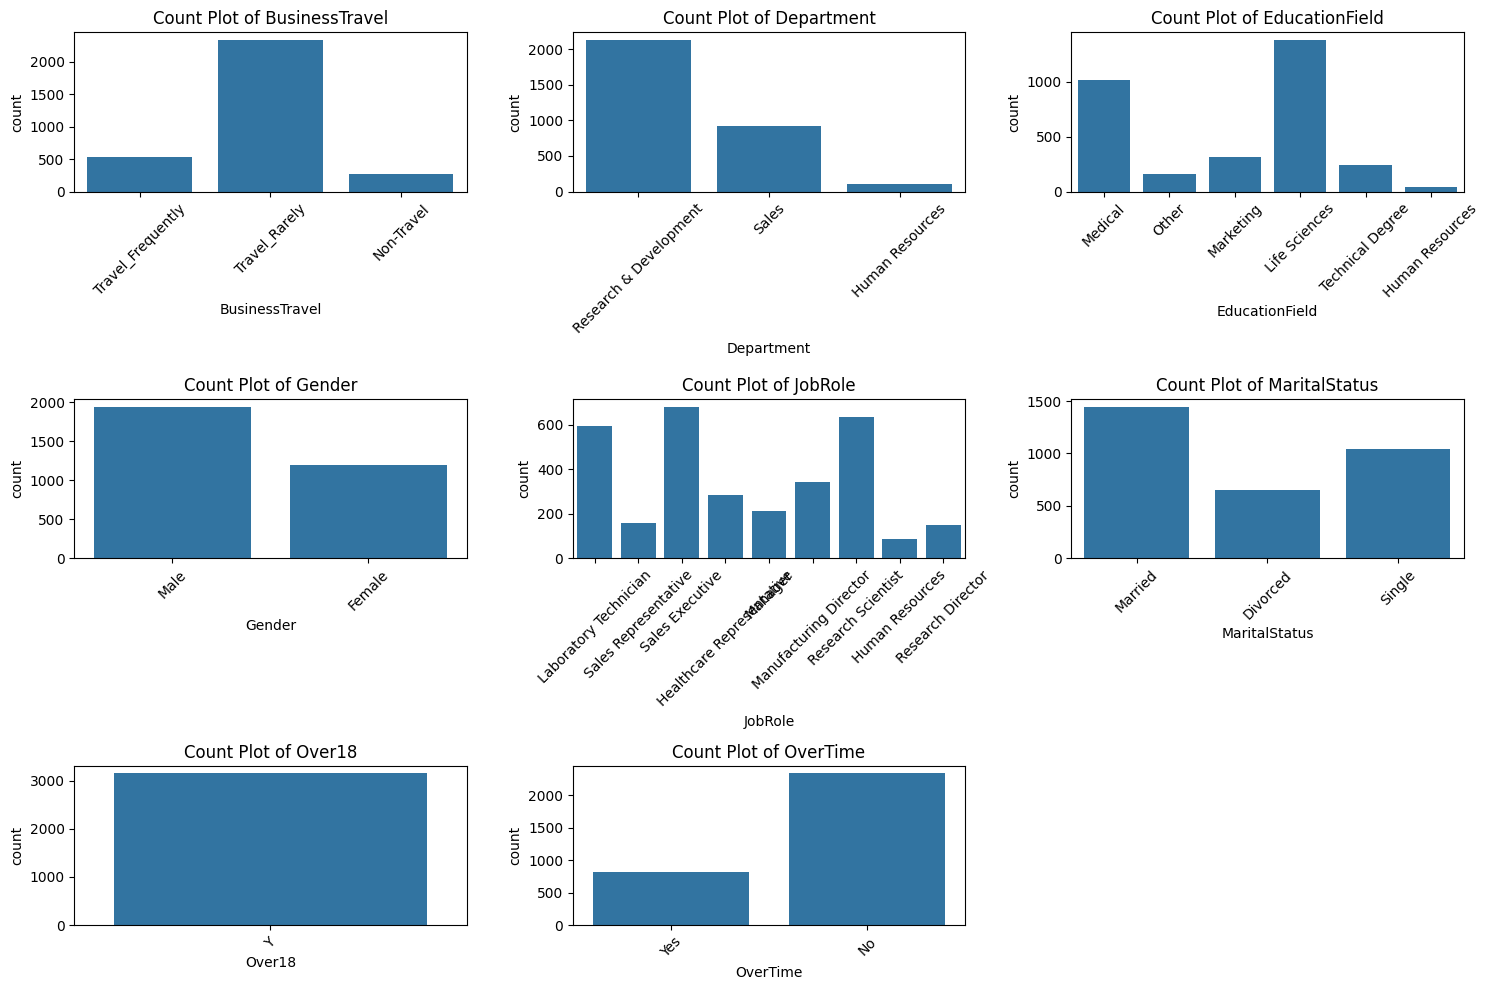

In [ ]:
# Count plots for categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=train_data)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

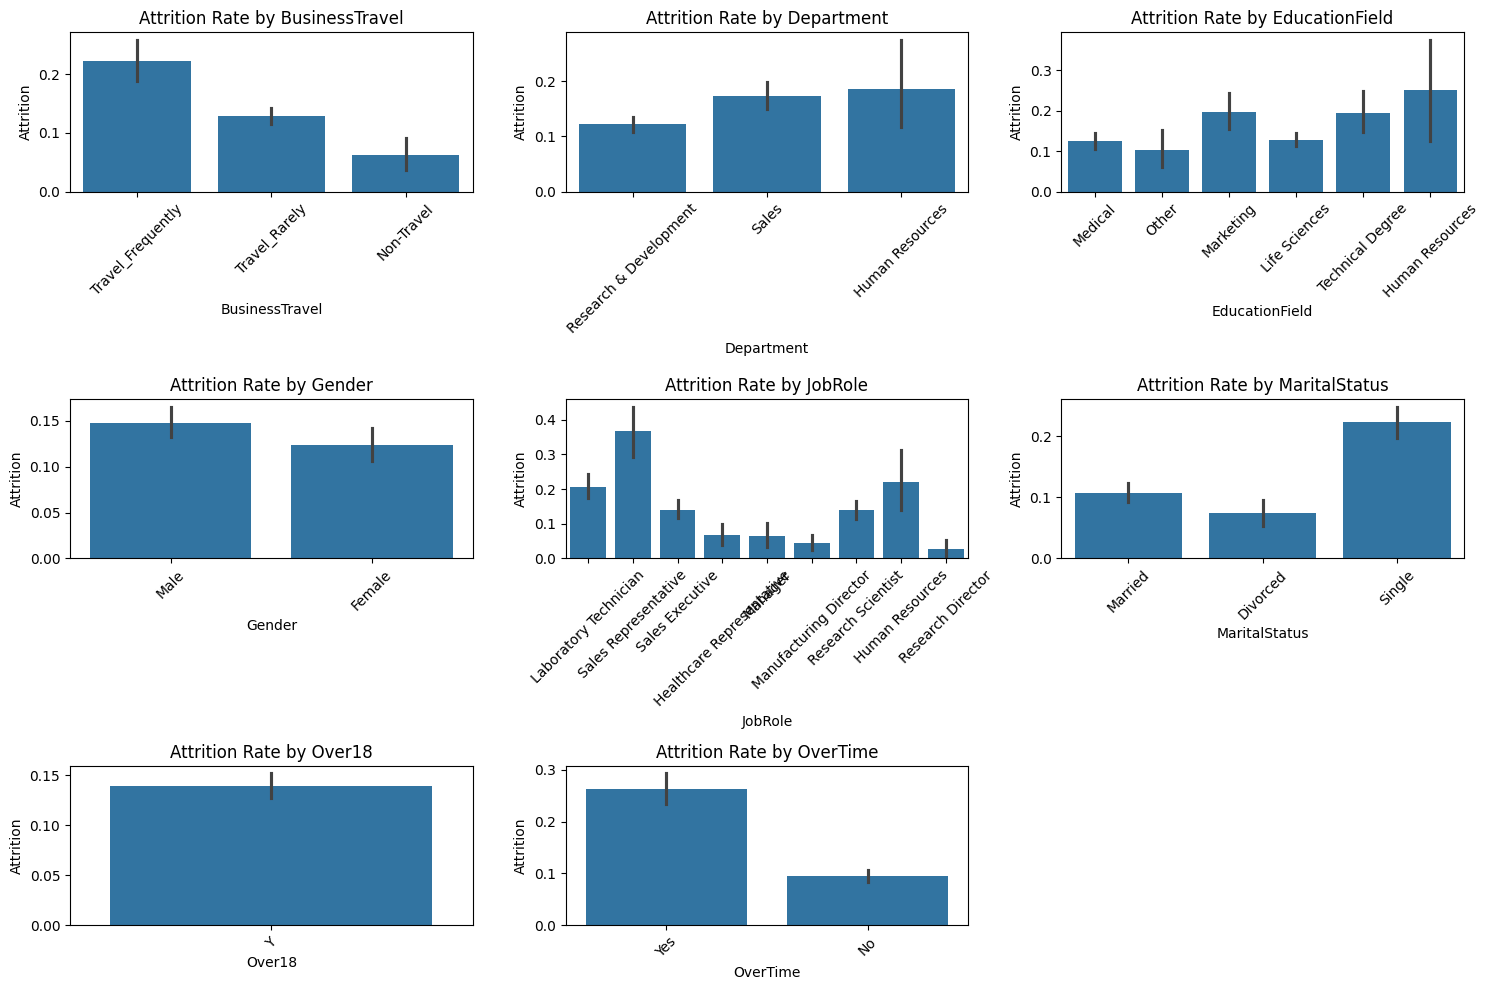

In [ ]:
# Proportion of attrition in each category
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x=col, y='Attrition', data=train_data)
    plt.title(f'Attrition Rate by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [ ]:
# ------------- Conduct cross-tabulation analyses ------------- #

# Cross-Tabulation between Department and Attrition
dept_attrition_ct = pd.crosstab(train_data['Department'], train_data['Attrition'])
print("Cross-Tabulation between Department and Attrition:\n", dept_attrition_ct)

# Cross-Tabulation between Gender and Attrition
gender_attrition_ct = pd.crosstab(train_data['Gender'], train_data['Attrition'])
print("Cross-Tabulation between Gender and Attrition:\n", gender_attrition_ct)

# Cross-Tabulation between BusinessTravel and Attrition
bus_travel_attrition_ct = pd.crosstab(train_data['BusinessTravel'], train_data['Attrition'])
print("Cross-Tabulation between BusinessTravel and Attrition:\n", bus_travel_attrition_ct)

# Cross-Tabulation between MaritalStatus and Attrition
marital_status_attrition_ct = pd.crosstab(train_data['MaritalStatus'], train_data['Attrition'])
print("Cross-Tabulation between MaritalStatus and Attrition:\n", marital_status_attrition_ct)

# Cross-Tabulation between JobRole and Attrition
job_role_attrition_ct = pd.crosstab(train_data['JobRole'], train_data['Attrition'])
print("Cross-Tabulation between JobRole and Attrition:\n", job_role_attrition_ct)

Cross-Tabulation between Department and Attrition:
 Attrition                  0    1
Department                       
Human Resources           83   19
Research & Development  1869  259
Sales                    758  159
Cross-Tabulation between Gender and Attrition:
 Attrition     0    1
Gender              
Female     1052  149
Male       1658  288
Cross-Tabulation between BusinessTravel and Attrition:
 Attrition             0    1
BusinessTravel              
Non-Travel          259   17
Travel_Frequently   418  120
Travel_Rarely      2033  300
Cross-Tabulation between MaritalStatus and Attrition:
 Attrition         0    1
MaritalStatus           
Divorced        605   49
Married        1292  154
Single          813  234
Cross-Tabulation between JobRole and Attrition:
 Attrition                    0    1
JobRole                            
Healthcare Representative  267   19
Human Resources             67   19
Laboratory Technician      470  123
Manager                    199   14


### Comparative Analysis

Compare the distribution of key features between employees who left (Attrition = 1) and those who stayed (Attrition = 0).

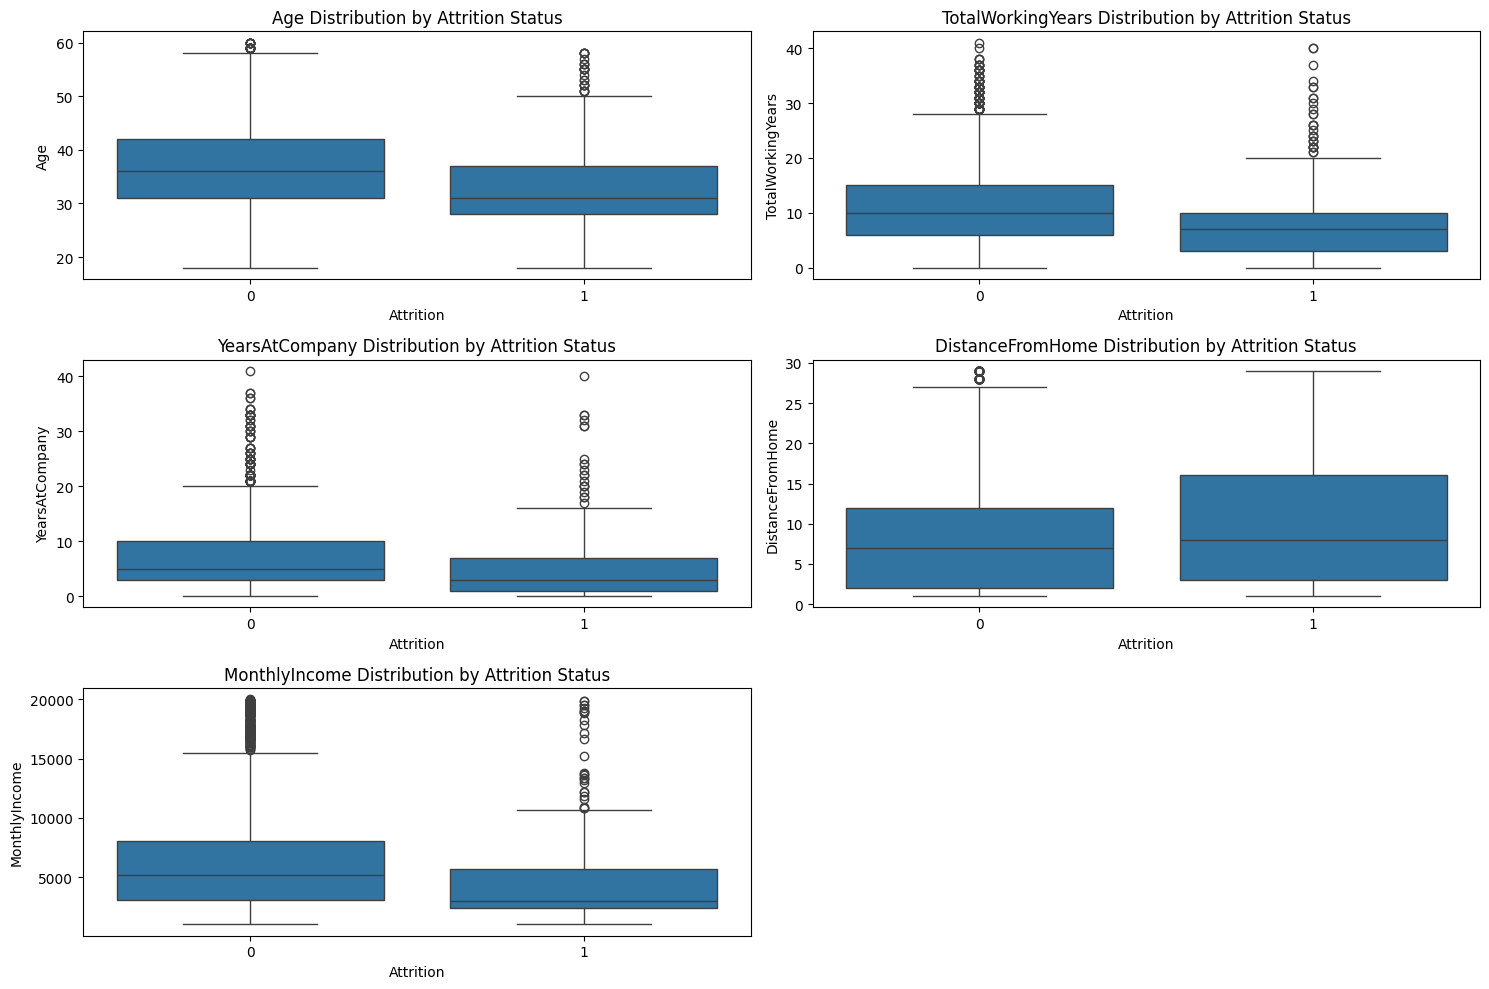

In [ ]:
# Numerical features comparison

import seaborn as sns
import matplotlib.pyplot as plt

# List of selected numerical features for comparison
selected_features = ['Age', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome', 'MonthlyIncome']

# Plotting comparisons
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Attrition', y=feature, data=train_data)
    plt.title(f'{feature} Distribution by Attrition Status')

plt.tight_layout()
plt.show()


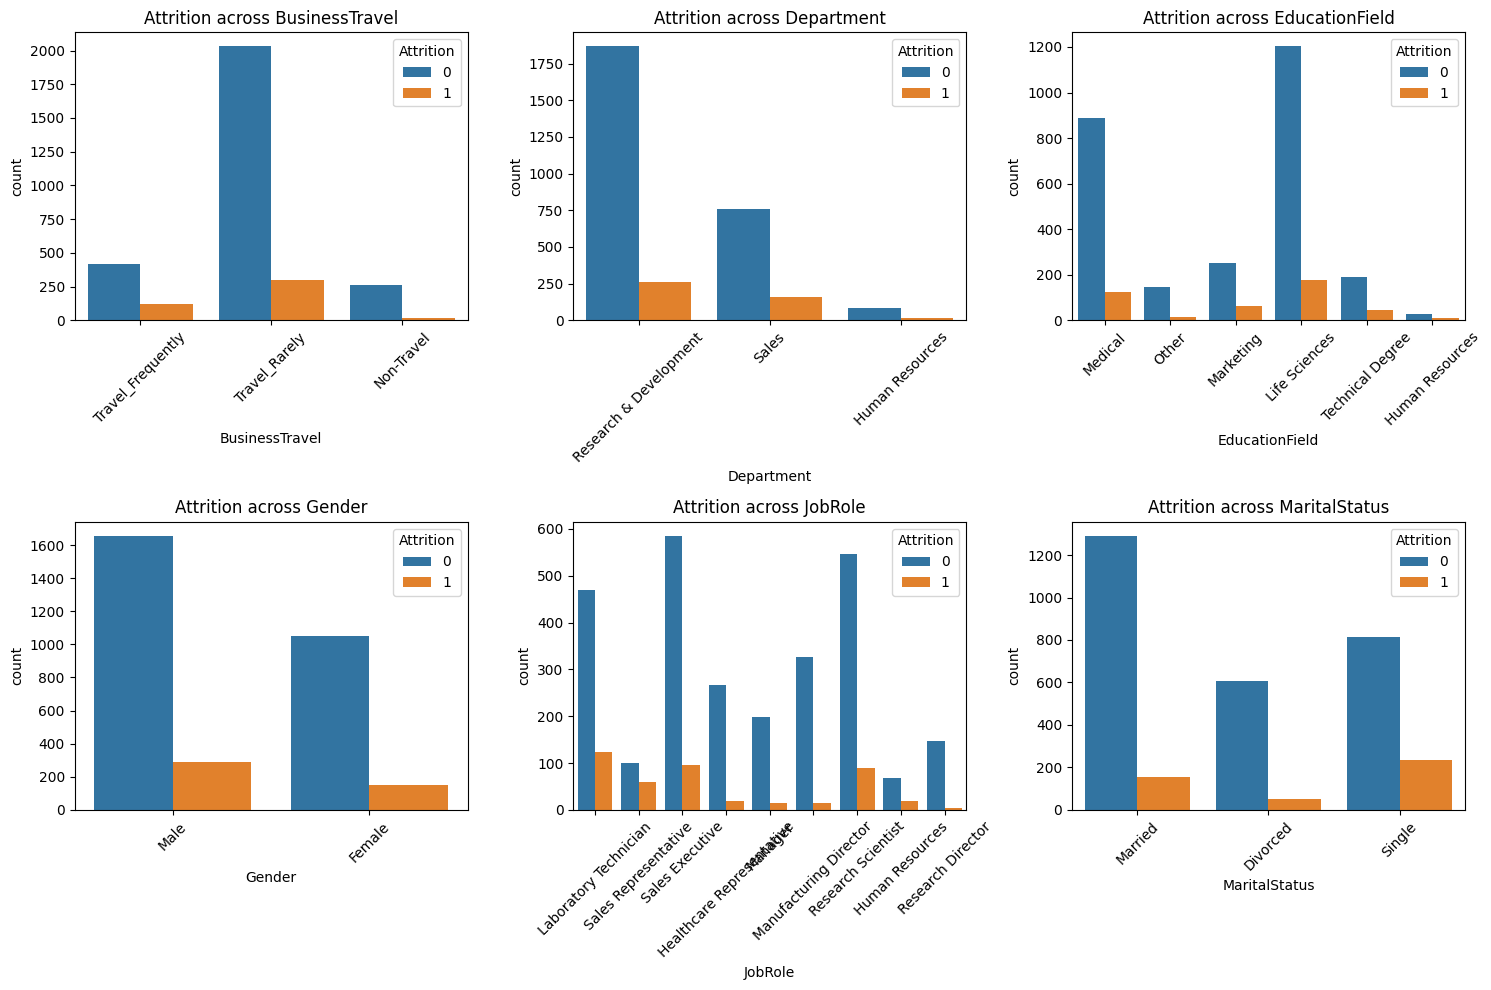

In [ ]:
# Categorical features comparison

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features in the dataset
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Plotting count plots for each categorical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=train_data, x=feature, hue='Attrition')
    plt.title(f'Attrition across {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


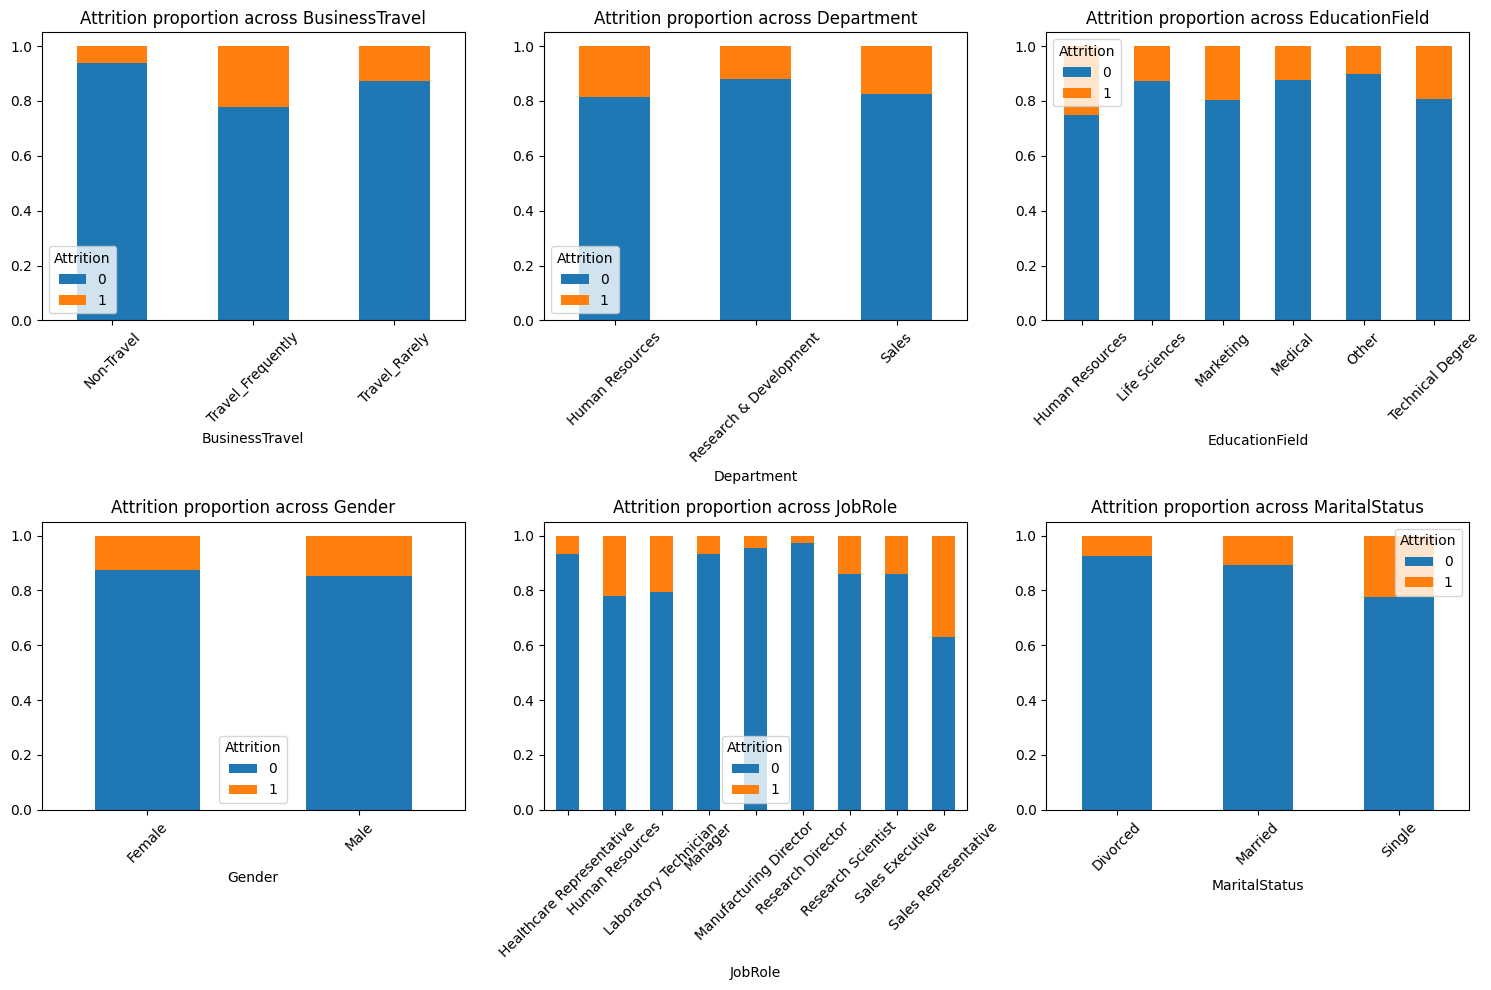

In [ ]:
# Plotting normalized bar plots for each categorical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    # Get the proportion of attrition within each category
    (train_data.groupby(feature)['Attrition']
     .value_counts(normalize=True)
     .unstack()
     .plot(kind='bar', stacked=True, ax=plt.gca()))
    plt.title(f'Attrition proportion across {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [ ]:
from scipy.stats import ttest_ind

def perform_t_test(feature):
    group1 = train_data[train_data['Attrition'] == 0][feature]
    group2 = train_data[train_data['Attrition'] == 1][feature]
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Set equal_var to False for Welch's t-test
    print(f"T-test for {feature}:\n t-statistic = {t_stat:.4f}, p-value = {p_value:.8f}\n")

# Updated list of features to test
features_to_test = [
    'Age', 'StockOptionLevel', 'JobLevel', 'JobSatisfaction',
    'TotalWorkingYears', 'YearsInCurrentRole'
]

# Perform t-tests for each feature
for feature in features_to_test:
    perform_t_test(feature)


T-test for Age:
 t-statistic = 8.6613, p-value = 0.00000000

T-test for StockOptionLevel:
 t-statistic = 9.3817, p-value = 0.00000000

T-test for JobLevel:
 t-statistic = 9.5711, p-value = 0.00000000

T-test for JobSatisfaction:
 t-statistic = 4.6535, p-value = 0.00000405

T-test for TotalWorkingYears:
 t-statistic = 9.0726, p-value = 0.00000000

T-test for YearsInCurrentRole:
 t-statistic = 8.9409, p-value = 0.00000000



### Multivariate Analysis

Use scatter plots, pair plots, or heatmaps to understand the relationships between multiple variables.


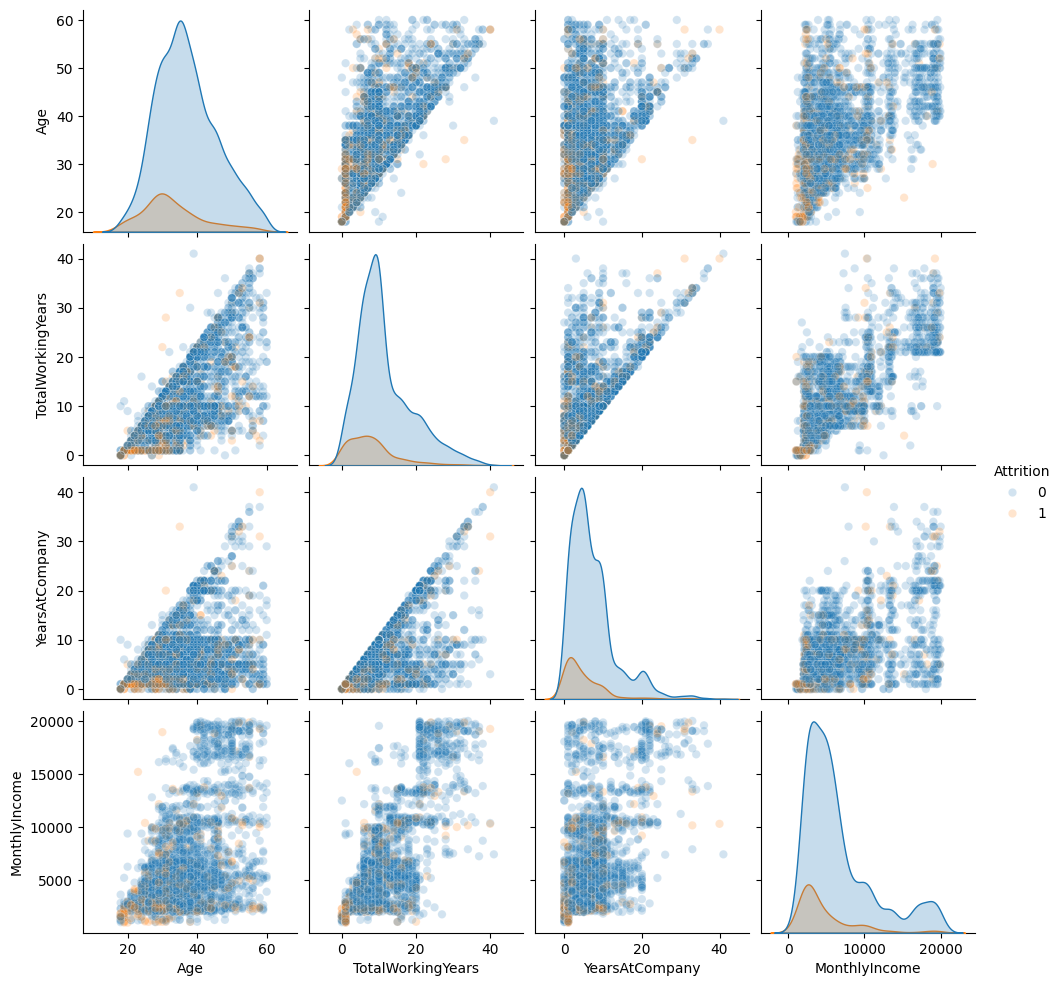

In [ ]:
# Use pair plot to show relationships between pairs of numerical features along with distributions for each feature, segmented by 'Attrition'.
import seaborn as sns

# Pairplot for selected numerical features including 'Attrition'
selected_features = ['Age', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome', 'Attrition']  # Include other features as needed
sns.pairplot(train_data[selected_features], hue='Attrition', plot_kws={'alpha': 0.2})


<ipython-input-28-74425bde32fb>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.019089         -0.024006   0.214986   
DailyRate                 0.019089   1.000000          0.006007  -0.010259   
DistanceFromHome         -0.024006   0.006007          1.000000   0.003512   
Education                 0.214986  -0.010259          0.003512   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EnvironmentSatisfaction   0.019248   0.014082         -0.005604  -0.018394   
HourlyRate                0.025010   0.016439          0.016782   0.016324   
JobInvolvement            0.014198   0.014647          0.008171   0.047918   
JobLevel                  0.494513   0.018918         -0.022935   0.092793   
JobSatisfaction          -0.008569  -0.000990          0.011079  -0.021315   
MonthlyIncome             0.484906   0.013665         -0.038530   0.087150   
MonthlyRate               0.017596  -0.018623          0.022792 

<Axes: >

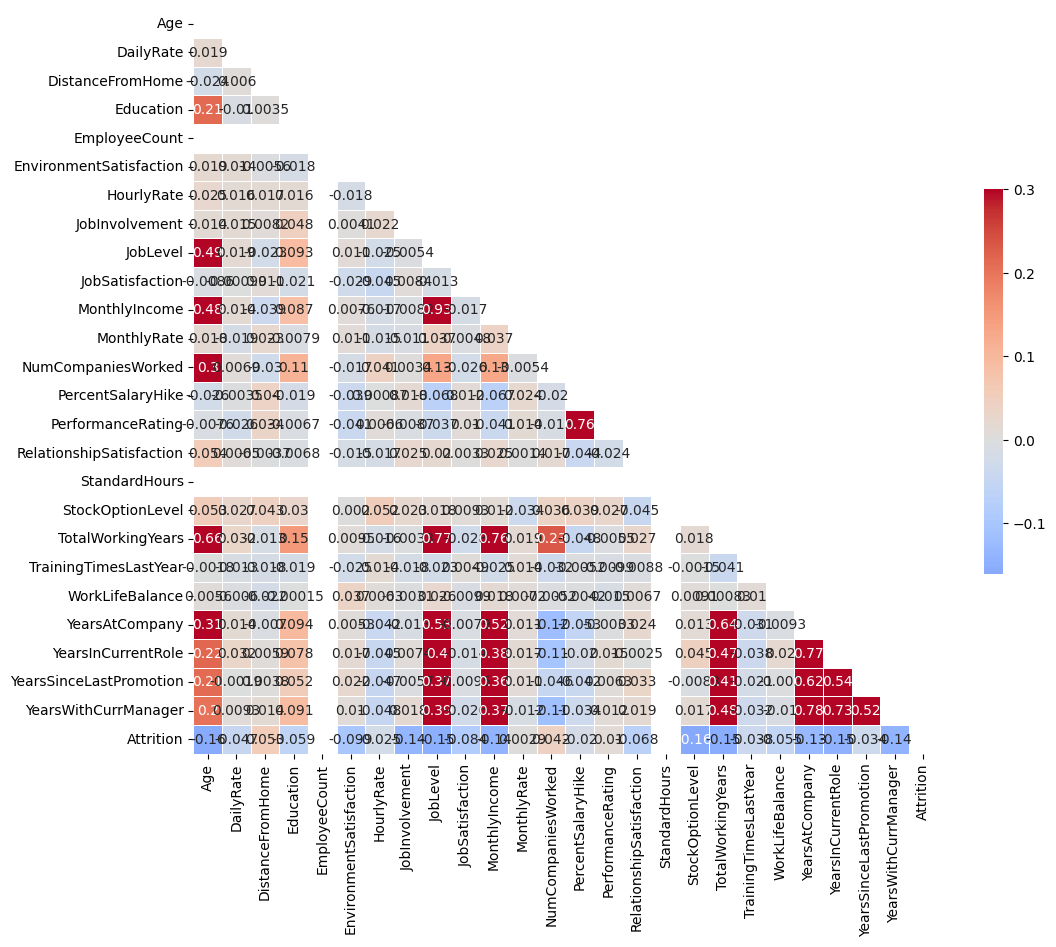

In [ ]:
# Implement heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical features including 'Attrition'
corr_matrix = train_data.corr()
print(corr_matrix)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Text(0, 0.5, 'Principal Component 2')

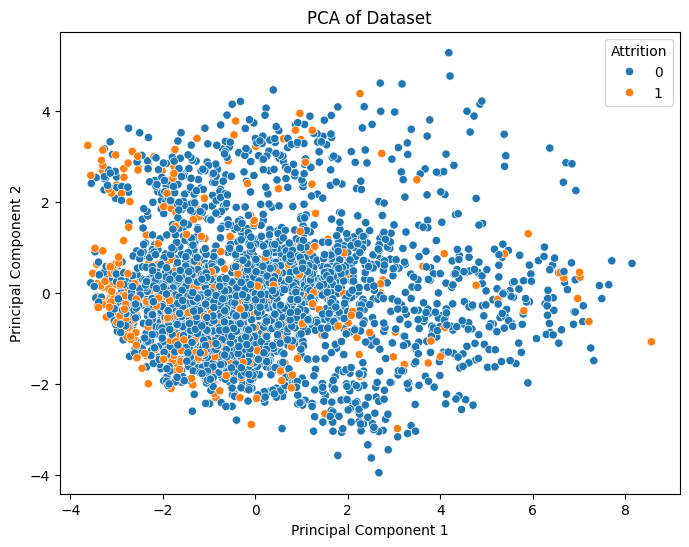

In [ ]:
# Conduct principal component analysis (PCA) to reduce dimensionality
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardizing the data before applying PCA
features = train_data.select_dtypes(include=[np.number]).columns
X = train_data[features].drop('Attrition', axis=1)
y = train_data['Attrition']

X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Plot the PCA-transformed version of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


### Time-Based Analysis

Analyze the distribution of key time based feature(s) over time.

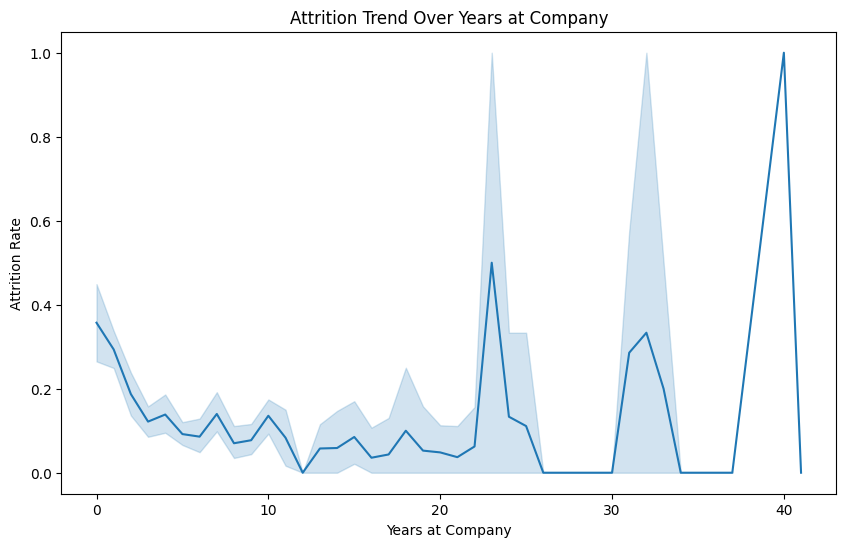

In [ ]:
# Conduct trend analysis for the available time-series data

import seaborn as sns
import matplotlib.pyplot as plt

# Plot 'YearsAtCompany' against 'Attrition'
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x='YearsAtCompany', y='Attrition')
plt.title('Attrition Trend Over Years at Company')
plt.ylabel('Attrition Rate')
plt.xlabel('Years at Company')
plt.show()

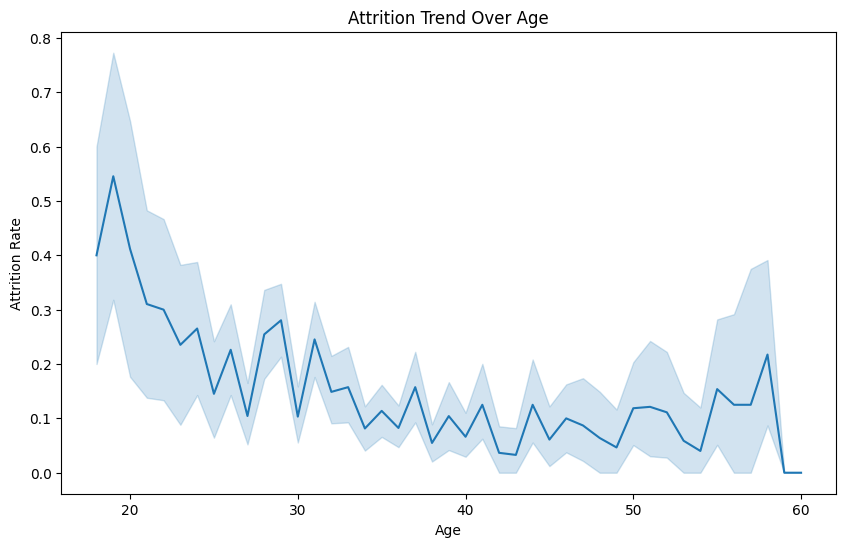

In [ ]:
# Conduct trend analysis for the available time-series data

import seaborn as sns
import matplotlib.pyplot as plt

# Plot 'Age' against 'Attrition'
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x='Age', y='Attrition')
plt.title('Attrition Trend Over Age')
plt.ylabel('Attrition Rate')
plt.xlabel('Age')
plt.show()

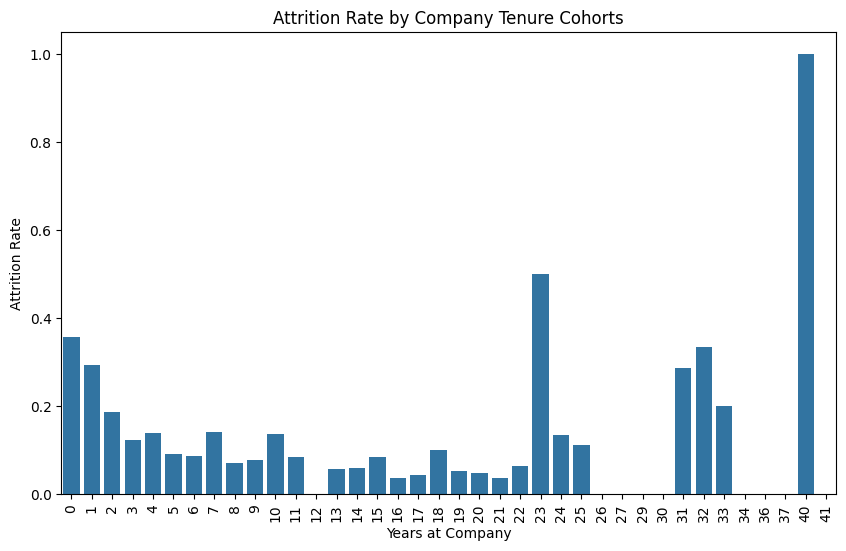

In [ ]:
# Group by 'YearsAtCompany' and calculate attrition rate
cohort_data = train_data.groupby('YearsAtCompany')['Attrition'].mean().reset_index()

# Plot the cohort data
plt.figure(figsize=(10, 6))
sns.barplot(data=cohort_data, x='YearsAtCompany', y='Attrition')
plt.title('Attrition Rate by Company Tenure Cohorts')
plt.ylabel('Attrition Rate')
plt.xlabel('Years at Company')
plt.xticks(rotation=90)
plt.show()

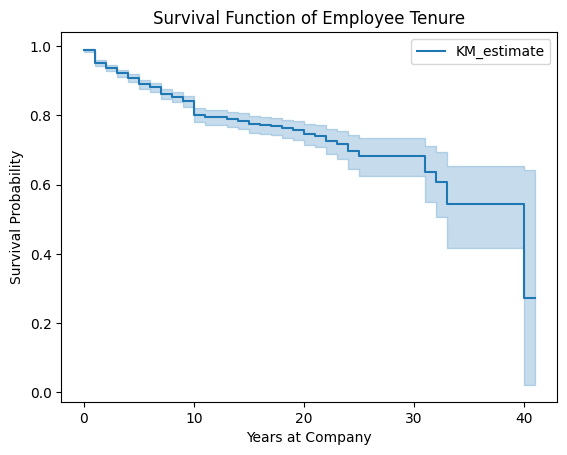

In [ ]:
# Conduct survival analysis for the available time-to-event data
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier model
kmf = KaplanMeierFitter()

# Fit the model to the data
kmf.fit(durations=train_data['YearsAtCompany'], event_observed=train_data['Attrition'])

# Plot the survival function
kmf.plot()
plt.title('Survival Function of Employee Tenure')
plt.ylabel('Survival Probability')
plt.xlabel('Years at Company')
plt.show()


### Impact of Categorical Features

Use box plots or violin plots to see how categorical features impact key numerical variables or the target variable.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Preprocessing for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='drop'  # Drop other columns
)

# Define the model
model = LogisticRegression(max_iter=1000)

# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Separate target from predictors
y = train_data['Attrition']
X = train_data[categorical_cols]  # Only use categorical columns

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get the feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Get the coefficients from the model
coefficients = pipeline.named_steps['model'].coef_[0]

# Match coefficients to feature names
feature_impact = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)
feature_impact


JobRole_Sales Representative         1.368096
JobRole_Research Director           -1.199004
JobRole_Manufacturing Director      -1.000243
EducationField_Human Resources       0.904769
JobRole_Laboratory Technician        0.847351
JobRole_Human Resources              0.773199
MaritalStatus_Single                 0.710517
OverTime_Yes                         0.644548
OverTime_No                         -0.644432
BusinessTravel_Non-Travel           -0.617678
BusinessTravel_Travel_Frequently     0.603659
EducationField_Other                -0.551196
JobRole_Manager                     -0.489208
JobRole_Healthcare Representative   -0.482272
MaritalStatus_Divorced              -0.469104
EducationField_Medical              -0.346953
EducationField_Life Sciences        -0.321070
Department_Human Resources          -0.260835
MaritalStatus_Married               -0.241297
Department_Sales                     0.206301
EducationField_Technical Degree      0.164419
EducationField_Marketing          

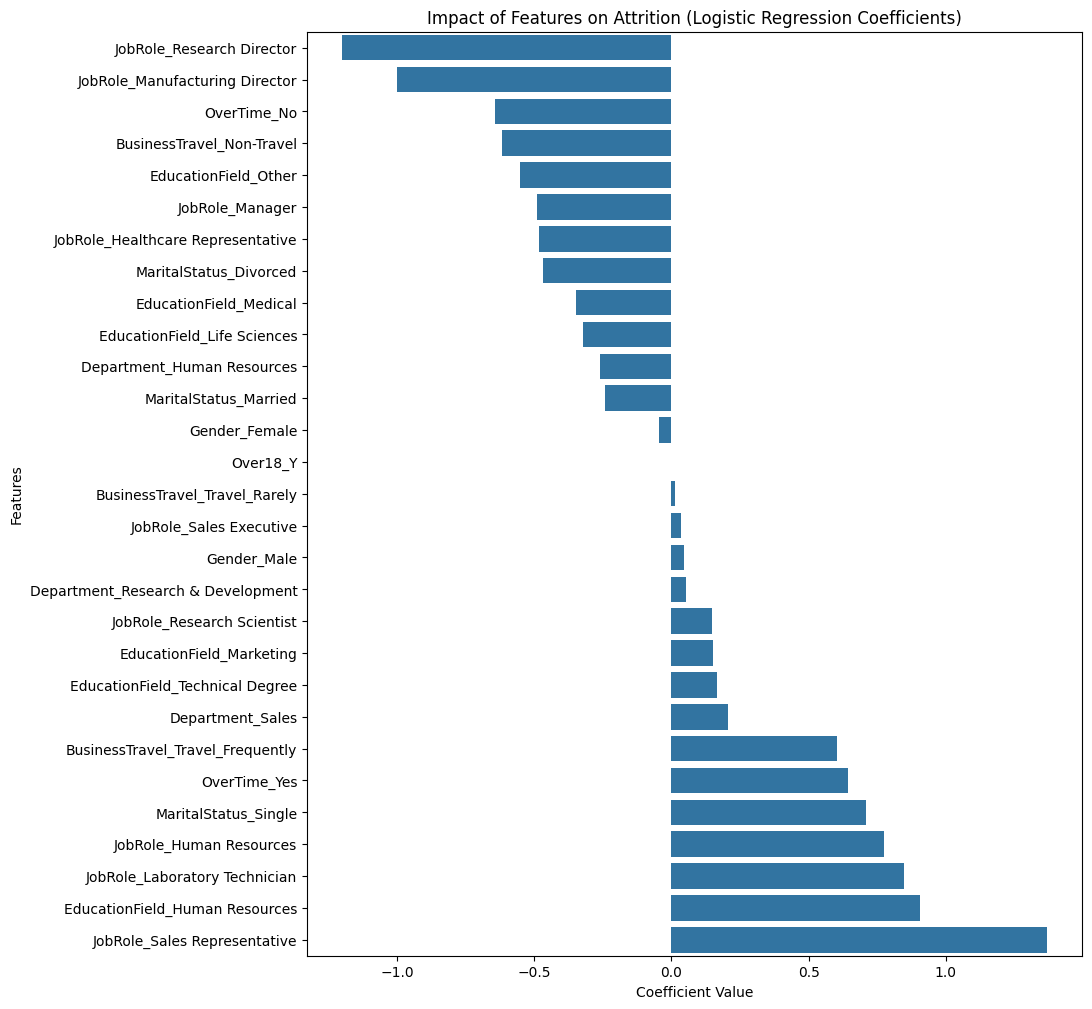

In [ ]:
# Visualize the coefficients for the categorical features
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'coefficients' is your Series or DataFrame column containing the coefficients
coefficients_series = pd.Series(coefficients, index=feature_names)

# Sort the features by their impact
sorted_features = coefficients_series.sort_values()

# Create a bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x=sorted_features.values, y=sorted_features.index)

# Add labels and title
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Impact of Features on Attrition (Logistic Regression Coefficients)')

plt.show()

In [ ]:
# Use chi-square test to identify the most important categorical features

from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Chi-Squared test for each categorical feature
chi2_results = pd.DataFrame(columns=['Feature', 'Chi2', 'P-value'])
for col in categorical_cols:
    contingency_table = pd.crosstab(train_data[col], train_data['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results = chi2_results.append({'Feature': col, 'Chi2': chi2, 'P-value': p}, ignore_index=True)

print(chi2_results.sort_values('P-value'))


          Feature        Chi2       P-value
7        OverTime  141.666593  1.150226e-32
4         JobRole  162.560127  4.660617e-31
5   MaritalStatus   97.738060  5.976542e-22
0  BusinessTravel   47.725246  4.331064e-11
2  EducationField   23.354349  2.887710e-04
1      Department   16.295558  2.893773e-04
3          Gender    3.359905  6.680190e-02
6          Over18    0.000000  1.000000e+00
